# Clasificación de Imágenes Rostro Ruben y Otro con VGG-16

En este Jupyter Notebook, vamos a desarrollar un clasificador de imágenes utilizando la arquitectura de red neuronal convolucional (CNN) conocida como VGG-16. Este modelo ha demostrado ser muy efectivo en tareas de clasificación de imágenes.

El objetivo es distinguir entre imágenes personales de Ruben con imagenes de Otras personas con un dataset local.

VGG-16 es una arquitectura de CNN propuesta por K. Simonyan y A. Zisserman de la Universidad de Oxford en el paper "Very Deep Convolutional Networks for Large-Scale Image Recognition". Esta red es caracterizada por su simplicidad, utilizando solo capas convolucionales 3x3 apiladas una sobre otra en profundidad creciente.

Vamos a entrenar nuestro modelo en este conjunto de datos y evaluar su rendimiento. A lo largo de este notebook, exploraremos diferentes aspectos del proceso de entrenamiento y optimización del modelo, así como también la evaluación de su rendimiento.

Primero, vamos a importar las bibliotecas necesarias:

In [1]:
!pip install ipykernel
!pip install opencv-python
!pip install keras
!pip install scikit-learn
!pip install tensorflow
!pip install matplotlib

In [2]:
import os
import cv2
import numpy as np
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

Cargamos las imágenes personales de Ruben y Otros:

In [5]:
def load_images(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (224, 224))  # Cambiamos la dimensión para que coincida con la dimensión de entrada de VGG-16
            images.append(img)
            if 'Dog1' in folder:
                labels.append(1)
            elif 'Cat1' in folder:
                labels.append(0)
    return images, labels

dogs_images, dogs_labels = load_images('C:/Users/Ruben Tocain/OneDrive - MSFT/Dataset_Maestria/Percepcion_Computacional/data/PetImages/Dog1')
cats_images, cats_labels = load_images('C:/Users/Ruben Tocain/OneDrive - MSFT/Dataset_Maestria/Percepcion_Computacional/data/PetImages/Cat1')

# Combinamos los arrays de perros y gatos
images = np.array(dogs_images + cats_images)
labels = np.array(dogs_labels + cats_labels)

# One-hot encoding de las etiquetas
labels = to_categorical(labels)

Dividmos los datos en conjuntos de entrenamiento y prueba:

In [6]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

Construimos y entrenamos la red neuronal convolucional VGG-16:

In [7]:
# Definimos el callback de EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Cargamos la red VGG16, asegurándonos de que se dejan fuera las capas superiores de la red preentrenada (head FC layer)
baseModel = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Construimos la capa que se colocará en la parte superior del modelo base (baseModel)
model = Sequential()
model.add(baseModel)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Agregamos una capa de Dropout con una tasa de 0.5
model.add(Dense(2, activation='softmax'))  # Dos clases (perro y gato), por lo que la capa de salida tiene 2 neuronas

# Congelamos las capas del modelo base para que no se actualicen durante el entrenamiento
for layer in baseModel.layers:
    layer.trainable = False

# Compilamos el modelo 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamos el modelo
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, callbacks=[early_stopping])

# Evaluamos el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 99s 8s/step - accuracy: 0.7287 - loss: 25.7166 - val_accuracy: 0.9222 - val_loss: 3.4862
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 100s 8s/step - accuracy: 0.9779 - loss: 0.8743 - val_accuracy: 0.9222 - val_loss: 2.8625
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 100s 8s/step - accuracy: 0.9988 - loss: 0.0042 - val_accuracy: 0.9444 - val_loss: 2.0918
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 100s 8s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9222 - val_loss: 1.9478
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 99s 8s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9333 - val_loss: 2.1590
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 95s 8s/step - accuracy: 1.0000 - loss: 6.2976e-10 - val_accuracy: 0.9333 - val_loss: 2.2420
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 98s 8s/step - accuracy: 1.0000 - loss: 7.3306e-09 - val_accuracy: 0.9333 - val_loss: 2.2684
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 96s 8s/st

In [8]:
# Hacemos una predicción con una nueva imagen para comprobar que el modelo funciona
img = cv2.imread('genaro.jpg')
img = cv2.resize(img, (224, 224))
img = np.expand_dims(img, axis=0)
pred = model_cargado.predict(img)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 930ms/step
[[0. 1.]]


Perro


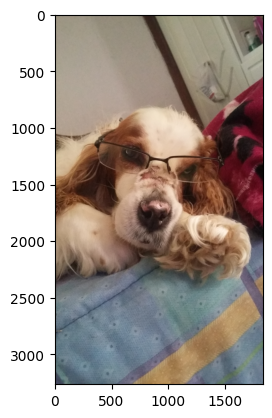

In [9]:
# Mostramos la etiqueta de la predicción
if pred[0][0] > pred[0][1]:
    print('Gato')
else:
    print('Perro')

# Mostramos la imagen con la etiqueta en el notebook
import matplotlib.pyplot as plt
img = cv2.imread('genaro.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))